# 1. Clustering (25 points)

Consider a dataset consisting of 6 data points $A,B,C,D,E,F$ as shown in Figure 1. The pair next to each point shows the x and y coordinates of each data point. We wish to group the datapoints into k clusters according to the K-means criterion, and using the `k-means++` algorithm (Arthur and Vassilvitskii, 2007).

![image.png](docs/images/figure1.png)

Figure 1: Dataset for Question 1

1. Consider $k = 1$. What is the cluster center? (I.e., what is the centroid of the entire dataset?)
Now consider $k = 3$. We would like to study how k-means++ performs clustering on this dataset.
2. How does the algorithm choose the first initial cluster center $c_1$? (In other words, determine the probability of each data point being chosen as $c_1$).
3. Conditioned on A being chosen as $c_1$, how does the algorithm choose $c_2$?
4. Conditioned on $c_2 = F$ and $c_1 = A$, how does the algorithm choose $c_3$?
5. (Optional) Suppose that the algorithm chooses $c_3 = B$ - hence, $c_1 = A, c_2 = F, c_3 = B$. Assume we stop here. Determine the clustering $C$ based on the cluster centers $c_1, c_2, c_3$ and compute the corresponding cost $\phi$.
_Recall that for the K-means problem, the cost_ $\phi$ _of a dataset $X$ and a set of cluster centers_ $\mathcal{C} = \{c_1, ..., c_k\}$ _is_
$$\phi(X, C) = \sum_{x\in\mathcal{X}} \min_{c\in\mathcal{C}} \|x-c\|_2^2$$
6. Suppose that the `k-means++` algorithm chooses $c_3 = B$  - hence, $c_1 = A, c_2 = F, c_3 = B$. Determine the final clustering $C$ returned by `k-means++` based on the cluster centers $c_1, c_2, c_3$. Also argue how you determined that the algorithm has converged.

Deliverables: Report all necessary computations in tasks above.

## k-means++ computations

In [23]:
import numpy as np
from tabulate import tabulate

def kmeans(data, initial_centroids):
    centroids = np.array([data[point] for point in initial_centroids])
    prev_centroids = np.zeros(centroids.shape)
    clusters = {i: [] for i in range(len(centroids))}
    iteration = 1
    
    # Continue until centroids converge
    while not np.array_equal(centroids, prev_centroids):
        print(f"\nIteration {iteration}:\n{'-' * 20}")
        clusters = {i: [] for i in range(len(centroids))}

        # Assignment step
        table_data = []
        for point_name, point_coords in data.items():
            distances = np.linalg.norm(point_coords - centroids, axis=1)
            cluster_index = np.argmin(distances)
            clusters[cluster_index].append(point_name)
            table_data.append([point_name] + list(distances))
        headers = ["Point"] + [f"c{i+1}" for i in range(len(centroids))]
        print(tabulate(table_data, headers=headers, floatfmt=".4f"))

        # Update step
        prev_centroids = centroids.copy()
        for i, point_names in clusters.items():
            if point_names:
                new_centroid = np.mean([data[pn] for pn in point_names], axis=0)
                centroids[i] = new_centroid
                print(f"Updated cluster center, c{i+1}: from [{prev_centroids[i][0]:.4f}, "
                      f"{prev_centroids[i][1]:.4f}] to [{new_centroid[0]:.4f}, {new_centroid[1]:.4f}]")

        for i, point_names in clusters.items():
            print(f"Cluster c{i+1}: {point_names}")
        
        iteration += 1
    
    return clusters, centroids

# Data points
data = {
    'A': np.array([7., 0.]),
    'B': np.array([2., 0.]),
    'C': np.array([0., -2.]),
    'D': np.array([0., 2.]),
    'E': np.array([-6., -2.]),
    'F': np.array([-6., 2.])
}

# Initial centroids
initial_centroids = ['A', 'F', 'B']

clusters, final_centroids = kmeans(data, initial_centroids)

# Display final results
print("\nFinal Results:\n" + '-' * 20)
for i, point_names in clusters.items():
    print(f"Cluster c{i+1}: {point_names}")
for centroid in final_centroids:
    formatted_centroid = [f"{element:.4f}" for element in centroid]
    print(f"[{', '.join(formatted_centroid)}]")


Iteration 1:
--------------------
Point         c1       c2      c3
-------  -------  -------  ------
A         0.0000  13.1529  5.0000
B         5.0000   8.2462  0.0000
C         7.2801   7.2111  2.8284
D         7.2801   6.0000  2.8284
E        13.1529   4.0000  8.2462
F        13.1529   0.0000  8.2462
Updated cluster center, c1: from [7.0000, 0.0000] to [7.0000, 0.0000]
Updated cluster center, c2: from [-6.0000, 2.0000] to [-6.0000, 0.0000]
Updated cluster center, c3: from [2.0000, 0.0000] to [0.6667, 0.0000]
Cluster c1: ['A']
Cluster c2: ['E', 'F']
Cluster c3: ['B', 'C', 'D']

Iteration 2:
--------------------
Point         c1       c2      c3
-------  -------  -------  ------
A         0.0000  13.0000  6.3333
B         5.0000   8.0000  1.3333
C         7.2801   6.3246  2.1082
D         7.2801   6.3246  2.1082
E        13.1529   2.0000  6.9602
F        13.1529   2.0000  6.9602
Updated cluster center, c1: from [7.0000, 0.0000] to [7.0000, 0.0000]
Updated cluster center, c2: from [-

# 2. Sleep Well Revisited (25 points)

Sleep is one of the most fundamental physiological processes, and abnormal sleeping patterns are associated with poor health. They may, for example, indicate brain- & heart diseases, obesity and diabetes. During sleep our brain goes through a series of changes between different _sleep stages_, which are characterized by specific brain and body activity patterns. _Sleep staging_ refers to the process of mapping these transitions over a night of sleep. This is of fundamental importance in sleep medicine, because the sleep patterns combined with other variables provide the basis for diagnosing many sleep related disorders (Kales and Rechtschaffen, 1968, Iber and AASM, 2007). The stages can be determined by measuring the neuronal activity in the cerebral cortex (via electroencephalography, EEG), eye movements (via electrooculography, EOG), and/or the activity of facial muscles (via electromyography, EMG) in a _polysomnography_ (PSG) study. The classification into stages is done manually. This is a difficult and time-consuming process, in which expert clinicians inspect and segment the typically 8–24 hours long multi-channel signals. Contiguous, fixed-length intervals of 30 seconds are considered, and each of these _segments_ is classified individually. Algorithmic sleep staging aims at automating this process. The state-of-the-art in algorithmic sleep staging is marked by deep neural networks, which can be highly accurate and robust, even compared to human performance, see the recent work by Perslev et al. (2019) and references therein.

This assignment considers algorithmic sleep staging. The data is based on a single EEG channel from the Sleep-EDF-15 data set (Kemp et al., 2000, Goldberger et al., 2000). The input is given by an intermediate representation from the U-Time neural network architecture (Perslev et al., 2019), the targets are sleep stages. We created a training and test set, the inputs and the corresponding labels can be found in `X train.csv` and `y_train.csv` and `X_test.csv` and `y_test.csv`, respectively. Download and extract the data from https://github.com/christian-igel/ML/blob/main/data/Sleep-EDF-15_U-Time/.

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the data
X_train = pd.read_csv("data/Sleep-EDF-15_U-Time/X_train.csv", header=None)
y_train = pd.read_csv("data/Sleep-EDF-15_U-Time/y_train.csv", header=None)

# Print the summary statistics before scaling
summary_stats_before_scaling = X_train.describe(include='all')
print(f"Before scaling:\n{summary_stats_before_scaling}")

# Scale the data: mean 0, variance 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train) # convert back to pandas dataframe

# Display summary statistics after scaling to verify scaling
summary_stats_after_scaling = X_train.describe(include='all')
print(f"\nAfter scaling:\n{summary_stats_after_scaling}")

Before scaling:
                 0             1             2             3             4   \
count  33724.000000  33724.000000  33724.000000  33724.000000  33724.000000   
mean      -0.302029     -0.306572     -0.313401      0.648806      0.651631   
std        0.792973      0.668016      0.723008      1.322666      1.174943   
min       -0.755858     -0.610702     -0.708003     -0.568935     -0.646872   
25%       -0.747748     -0.604559     -0.689460     -0.469212     -0.630193   
50%       -0.721548     -0.589186     -0.658774      0.622001      1.162912   
75%       -0.266097     -0.467799     -0.476667      1.265073      1.533183   
max        3.683750      2.716119      3.740595     14.385462      6.232917   

                 5             6             7             8             9   \
count  33724.000000  33724.000000  33724.000000  33724.000000  33724.000000   
mean       0.228098     -0.291581     -0.242476      0.107429      0.454155   
std        1.062947      0.670415  

## 2.1 Principal Component Analysis (PCA)

Perform a principal component analysis of the training data `X_train.csv`. Plot the eigenspectrum (see the plot on slide 28 of the _PCA_ slides for an example). How many components are necessary to "explain 90% of the variance"? Visualize the data by a scatter plot of the data projected on the first two principal components. Use different colors for the different classes in the plot.

Deliverables: Description of software used; plot of the eigenspectrum; number of components necessary to explain 90% of variance; scatter plot of the data projected on the first two principal components with different colors indicating the 5 different classes

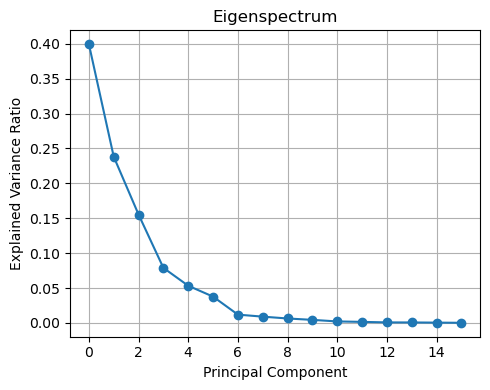

Number of components to explain 90% variance: 5


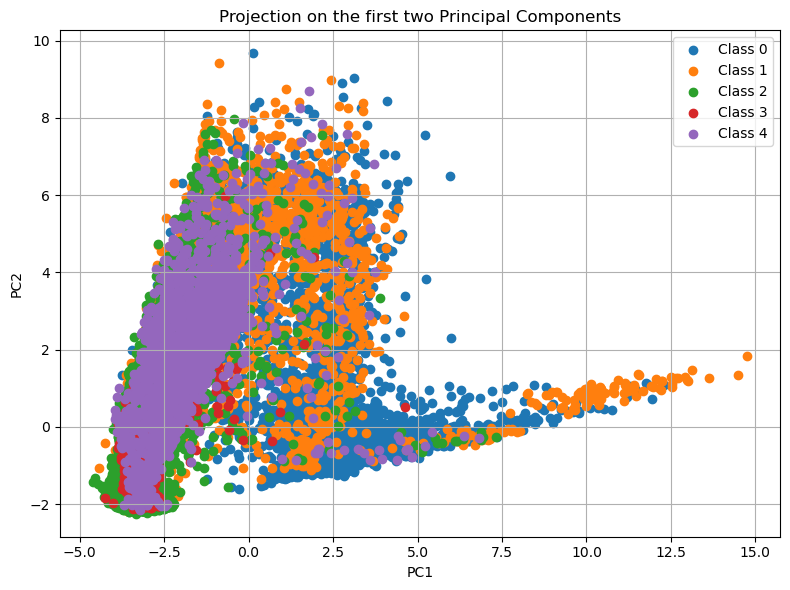

In [25]:
# Perform Principal Component Analysis (PCA)
from sklearn.decomposition import PCA

pca = PCA() # n_components=None, since we want to see the Eigenspectrum first
X_train_pca = pca.fit_transform(X_train)

# Plot the Eigenspectrum
import matplotlib.pyplot as plt

explained_var = pca.explained_variance_ratio_
plt.figure(figsize=(5, 4))
plt.plot(explained_var, 'o-')
plt.title('Eigenspectrum')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()

# Determine the number of components necessary to explain 90% of the variance:
cum_var = explained_var.cumsum()
n_components_90 = (cum_var < 0.9).sum() + 1 # +1 since we start counting from 0
print(f"Number of components to explain 90% variance: {n_components_90}")

# Scatter plot of the first two principal components:
plt.figure(figsize=(8, 6))
for label in y_train[0].unique(): # loop over all unique labels and plot them
    plt.scatter(X_train_pca[y_train[0] == label, 0], 
                X_train_pca[y_train[0] == label, 1], 
                label=f"Class {int(label)}")
plt.title('Projection on the first two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 2.2 Clustering using $k$-means

Perform 5-means clustering of `X_train.csv`. After that, project the cluster centers to the first two principal components of the training data. Then visualize the clusters by adding the cluster centers to the plot from the previous exercise.

Briefly discuss the results. In this example, you do not get 5 nicely separated clusters in 2D. A better looking projection of the data can be achieved using a non-linear dimensionality reduction technique, for example _non-linear t-Distributed Stochastic Neighbor Embedding_ (t-SNE) (?). Although not part of the exam, we recommend that you try it out.

Deliverables: Description of software used; one plot with cluster centers and data points; short discussion of results

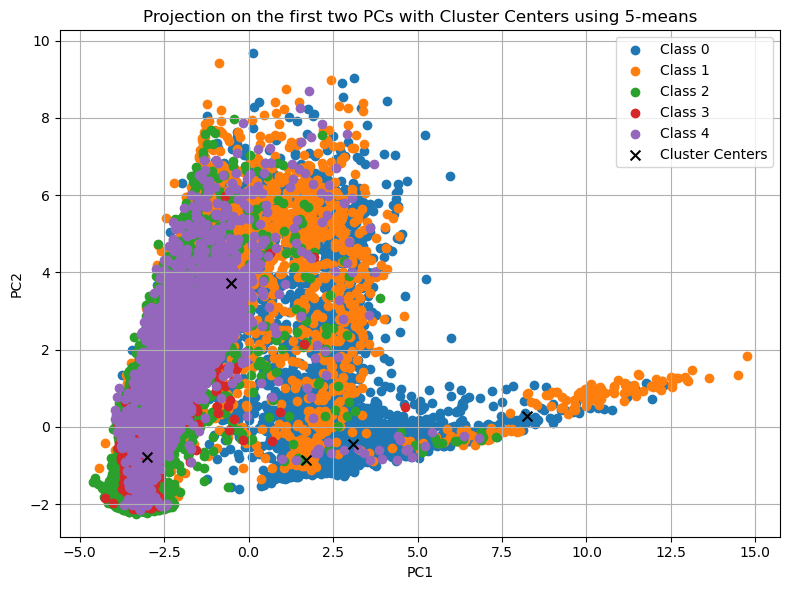

In [26]:
from sklearn.cluster import KMeans

# Perform 5-means clustering
kmeans = KMeans(n_clusters=5, n_init=1, random_state=0, init='random').fit(X_train)

# Project the cluster centers to the first two principal components
kmeans_cluster_centers_pca = pca.transform(kmeans.cluster_centers_)

# Plot the clusters by adding the cluster centers to the scatter plot
plt.figure(figsize=(8, 6))
for label in y_train[0].unique():
    plt.scatter(X_train_pca[y_train[0] == label, 0], 
                X_train_pca[y_train[0] == label, 1], 
                label=f"Class {int(label)}")
# Plot the cluster centers
plt.scatter(kmeans_cluster_centers_pca[:, 0], kmeans_cluster_centers_pca[:, 1], 
            c='black', marker='x', s=50, label='Cluster Centers') # s: marker size
plt.title('Projection on the first two PCs with Cluster Centers using 5-means')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Analysis of the data

In [27]:
# Statistical analysis of the clusters
import numpy as np

# Assign data points to clusters
kmeans_labels = kmeans.predict(X_train)

# Calculate meaningful statistics for each cluster
clusters = []
for i in range(5):
    cluster_points = X_train[kmeans_labels == i]
    num_points = cluster_points.shape[0]
    avg_distance = np.mean(np.linalg.norm(cluster_points - kmeans_cluster_centers_pca[i], axis=1))
    clusters.append([i, num_points, avg_distance])

# Show the results in a table
print(pd.DataFrame(clusters, columns=['Cluster', 'Number of Points', 'Avg. dist. to Centroid']))

   Cluster  Number of Points  Avg. dist. to Centroid
0        0               290               14.084396
1        1             11122                5.539399
2        2             12559                3.288416
3        3              5638                6.445733
4        4              4115                4.868275


### t-SNE

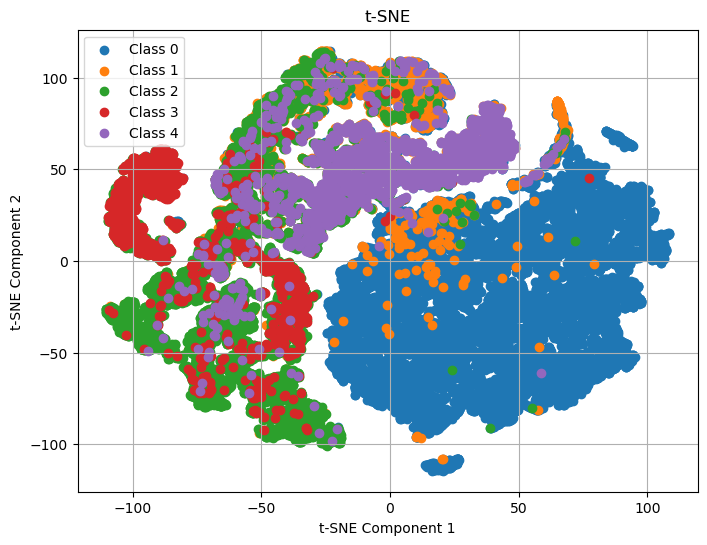

In [28]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=0)
X_train_tsne = tsne.fit_transform(X_train)

# Visualize the t-SNE results
plt.figure(figsize=(8, 6))
for label in y_train[0].unique():
    plt.scatter(X_train_tsne[y_train[0] == label, 0], 
                X_train_tsne[y_train[0] == label, 1], 
                label=f"Class {int(label)}")
plt.title('t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.grid(True)
plt.show()

## 2.3 Clustering using $k$-means++

Repeat the last part using 5-means++ and compare the resulting clusters with the ones obtained with regular 5-means. Are the clusters similar or different, and why? Provide argumentation, considering factors like the initialization of cluster centers, convergence behavior, and the impact on the clustering results.

Deliverables: description of software used; one plot with cluster centers and data points; discussion of results and discussion on comparison

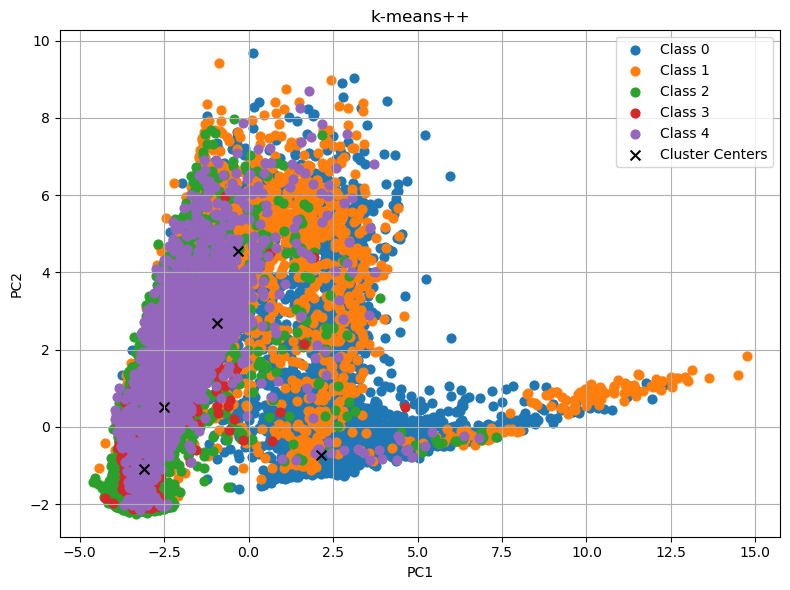

In [29]:
# Cluster the data
kmeans_pp = KMeans(n_clusters=5, n_init=1, random_state=0, init='k-means++')
kmeans_pp.fit(X_train)
labels_pp = kmeans_pp.labels_
kmeans_pp_cluster_centers_pca = pca.transform(kmeans_pp.cluster_centers_)

# Plot the results
plt.figure(figsize=(8, 6))

# Scatter plot for data points colored by class labels
for label in y_train[0].unique():
    plt.scatter(X_train_pca[y_train[0] == label, 0], X_train_pca[y_train[0] == label, 1], 
                label=f"Class {int(label)}", s=40)
# Scatter plot for cluster centers
plt.scatter(kmeans_pp_cluster_centers_pca[:, 0], kmeans_pp_cluster_centers_pca[:, 1],
            c='black', marker='x', s=50, label='Cluster Centers')
plt.title('k-means++')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Analysis of the data

In [30]:
# Statistical analysis of the clusters
import numpy as np

# Assign data points to clusters
kmeans_pp_labels = kmeans_pp.predict(X_train)

# Calculate meaningful statistics for each cluster
clusters = []
for i in range(5):
    cluster_points = X_train[kmeans_pp_labels == i]
    num_points = cluster_points.shape[0]
    avg_distance = np.mean(np.linalg.norm(cluster_points - kmeans_pp_cluster_centers_pca[i], axis=1))
    clusters.append([i, num_points, avg_distance])

# Show the results in a table
print(pd.DataFrame(clusters, columns=['Cluster', 'Number of Points', 'Avg. dist. to Centroid']))

   Cluster  Number of Points  Avg. dist. to Centroid
0        0              2627                5.553392
1        1             17005                3.810776
2        2              9213                5.295259
3        3              3096                8.842335
4        4              1783                7.528853


### Traditional k-means vs. k-means++

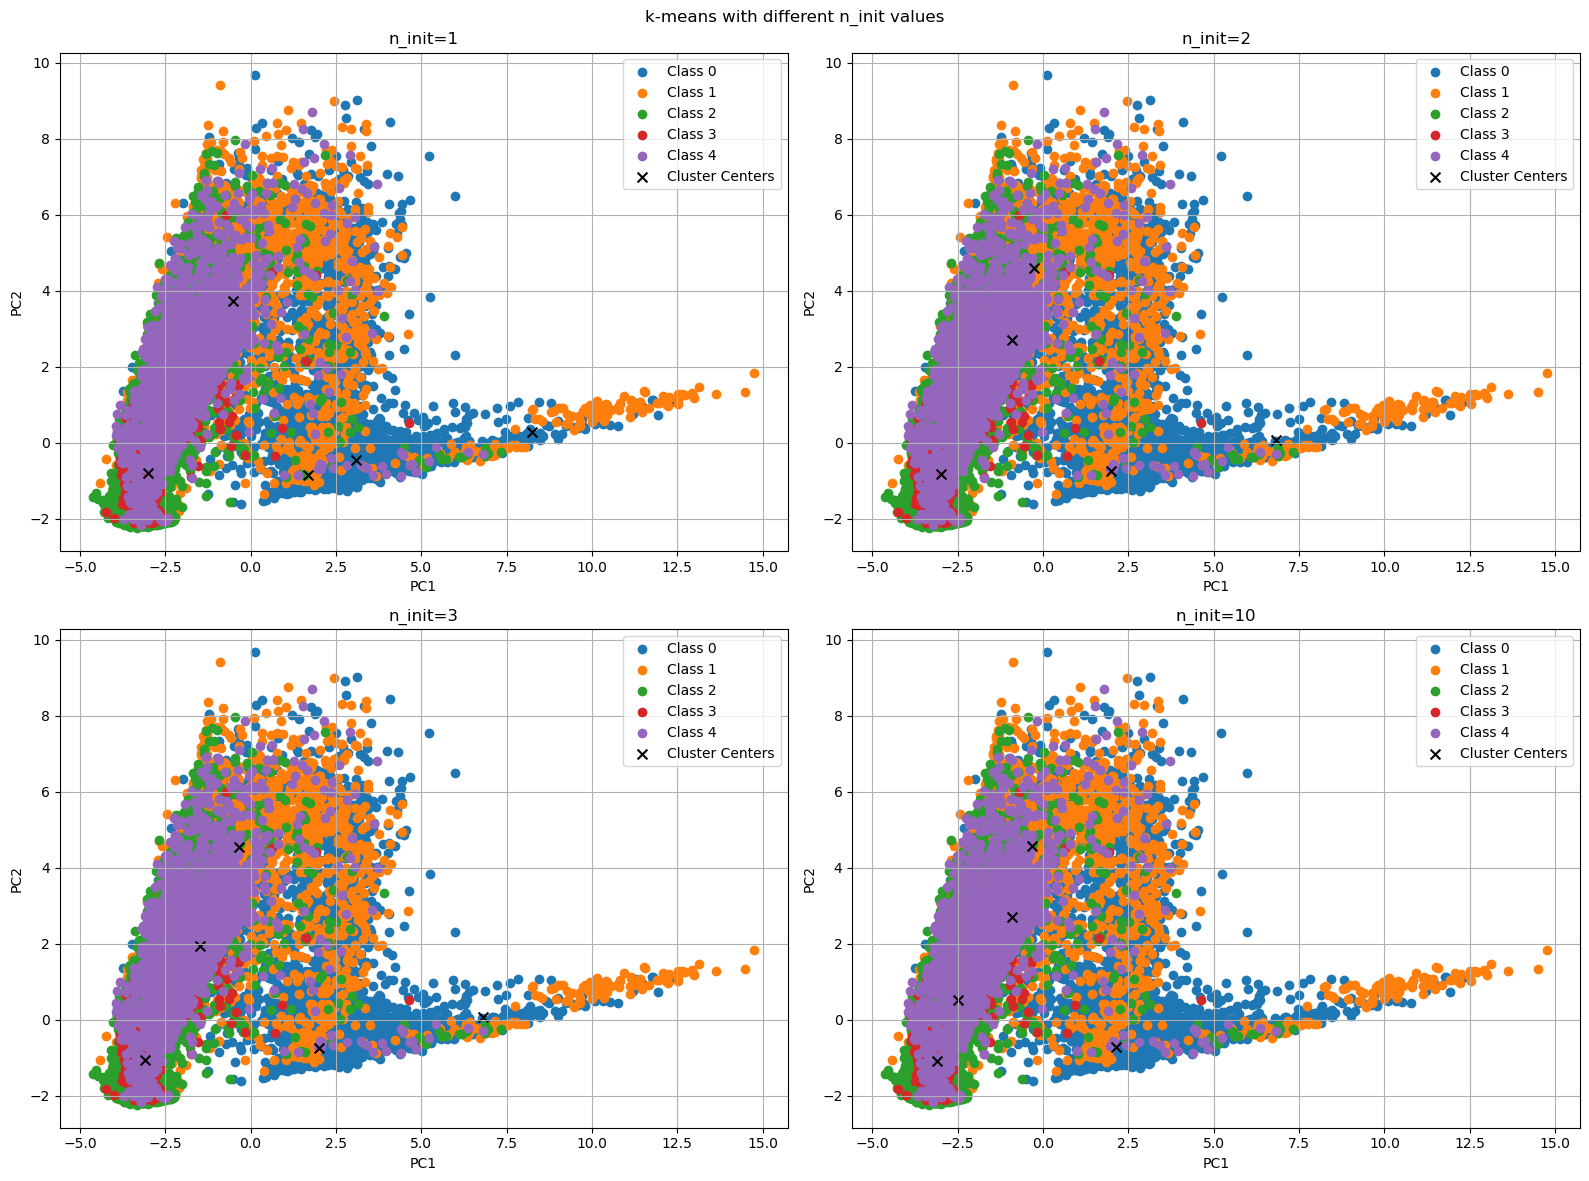

In [31]:
# Number of initializations (centroid seeds)
n_init_values = [1, 2, 3, 10]

# Create a subplot for each n_init value
plt.figure(figsize=(16, 12))

for i, n_init in enumerate(n_init_values):
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=5, n_init=n_init, random_state=0, init='random').fit(X_train)
    kmeans_cluster_centers = kmeans.cluster_centers_

    # Project the cluster centers to the first two principal components
    kmeans_cluster_centers_pca = pca.transform(kmeans_cluster_centers)

    # Create a subplot
    plt.subplot(2, 2, i+1)

    # Scatter plot for data points colored by class labels
    for label in y_train[0].unique():
        plt.scatter(X_train_pca[y_train[0] == label, 0], 
                    X_train_pca[y_train[0] == label, 1], 
                    label=f"Class {int(label)}")

    # Scatter plot for cluster centers
    plt.scatter(kmeans_cluster_centers_pca[:, 0], kmeans_cluster_centers_pca[:, 1], 
                c='black', marker='x', s=50, label='Cluster Centers') # s: marker size
    plt.title(f'n_init={n_init}')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid(True)
    plt.tight_layout()
    plt.legend()

plt.suptitle('k-means with different n_init values')
plt.tight_layout()
plt.show()